### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.

### Знакомство с данными

In [1]:
# Подключаем все нужные нам библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math

In [2]:
#считываем данные и смотрим на них
df = pd.read_csv('/datasets/games.csv')
#df = pd.read_csv('games.csv')
display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Таблица состоит из 11 столбцов, в строках - информация об играх. 
- Максимальное количество непустых значений - 16715 - по всем играм определены платформы и объемы продаж.
- Менее 5% игр не имеют названия, жанра и/ или года выпуска.
- Оценка критиков дана 49% игр,пользователи оценили 60% игр.
- Возрастные ограничения определены для 60% игр.

### Подготовка данных

In [3]:
# приведем данные к нижнему регистру
df.columns = df.columns.str.lower()

In [4]:
# изменим типы данных
df['year_of_release'] = df['year_of_release'].astype('Int64') #год - это всегда целое число
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') #рейтинг - это числовое значение. если нет (в том числе и tbd - NaN)

In [5]:
# заменим пропуски
df = df.dropna(subset=['year_of_release'])# 269 nan -  пропусков, можно удалить, это меньше 2% данных
df = df.dropna(subset=['name'])# 2 nan -  пропуск, можно удалить, это меньше 1% данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [6]:
print(df['rating'].unique()) 

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Расшифровка:
- E    = 6+  = «Everyone» — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
- M    = 17+ = «Mature» — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. 
- T    = 13+ = «Teen» — «Подросткам»: Игра подходит для лиц от 13 лет.
- E10+ = 10+ = «Everyone 10 and older» — «Для всех от 10 лет и старше»:
- K-A  = 6+  = "K-A" ("Kids to Adults") = E = «Everyone»
- AO   = 18+ = «Adults Only 18+» — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. 
- EC   = 3+  = «Early childhood» — «Для детей младшего возраста»: Игра подходит для детей от 3 лет
- RP   =     = «Rating Pending» — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. 

Можно объединить группы Е и К-А, дублируютдруг друга.
RP и NAN заменим на Unknown

In [7]:
#Объединим группы Е и К-А
df['rating'] = df['rating'].where(df['rating'] != 'K-A', 'E')

#RP и NAN заменим на Unknown
df['rating'] = df['rating'].where(df['rating'] != 'RP', 'Unknown')
df['rating'] = df['rating'].fillna('Unknown')
print(df['rating'].unique())

['E' 'Unknown' 'M' 'T' 'E10+' 'AO' 'EC']


In [8]:
print(df['platform'].nunique()) # 31 уникальное значение - ок
print(df.duplicated().sum()) # дубликатов нет - ок

31
0


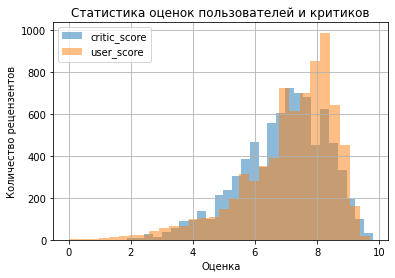

In [9]:
#Переведем рейтинги к общему порядку чисел и проанализируем данные
df['critic_score'] = df['critic_score']/10
ax = df['critic_score'].hist(bins = 30, alpha = 0.5, label = 'critic_score')
ax = df['user_score'].hist(bins = 30, alpha = 0.5, label = 'user_score')
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество рецензентов')
plt.title('Статистика оценок пользователей и критиков')
ax.legend();

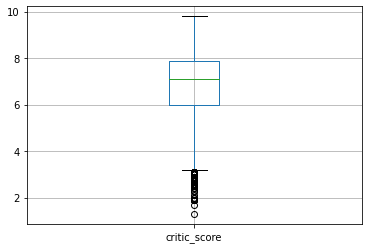

count    7983.000000
mean        6.899436
std         1.392006
min         1.300000
25%         6.000000
50%         7.100000
75%         7.900000
max         9.800000
Name: critic_score, dtype: float64

In [10]:
df.boxplot(column='critic_score') 
plt.show()
df['critic_score'].describe()

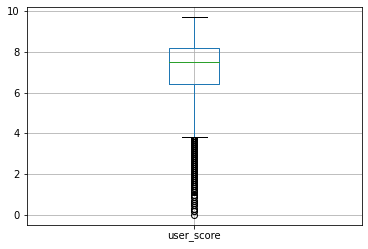

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [11]:
df.boxplot(column='user_score')
plt.show()
df['user_score'].describe()

Заменять пропуски в оценках пользователей и критиков не нужно - это может сместить выборку.

In [12]:
# вычислим суммарные продажи
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

### Исследовательский анализ

#### Задача: 

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

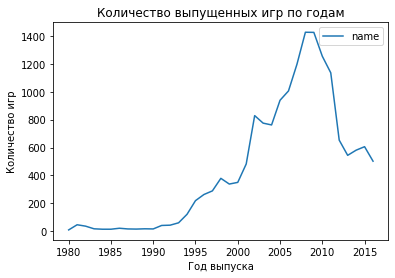

In [13]:
ax = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
#display(ax)
ax = ax.plot();
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
plt.title('Количество выпущенных игр по годам');

Данные до 2000 года можно не рассматривать: активный рост начинается с 2000, и пик приходится на 2009

#### Задача: 

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [14]:
# Определим топ-15 платформ по продажам (всего - 31 платформа)
display(df.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = ['sum']).sort_values(by = ('sum', 'total_sales'),ascending=False).head(15))

,sum
,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88


In [15]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS', 'PC', 'GB', 'XB', 'NES']

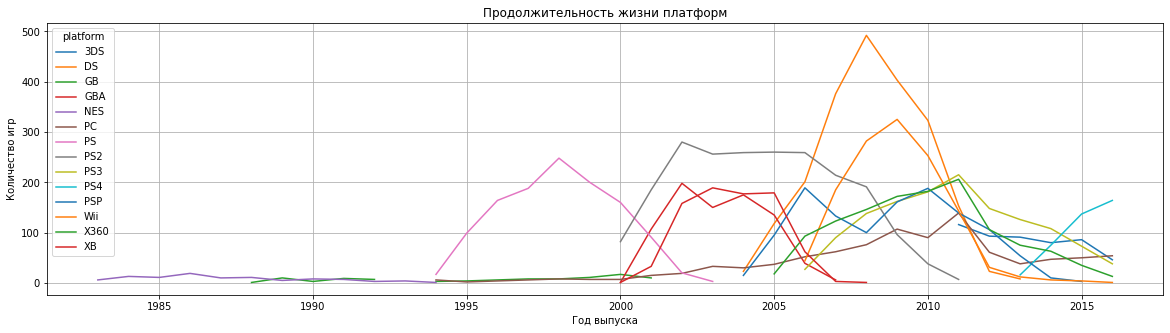

In [16]:
ax = df.loc[df['platform'].isin(top_platforms)].pivot_table(index = 'year_of_release', columns = 'platform', values = 'name', aggfunc = 'count')
ax = ax.plot(kind = 'line', figsize=(20, 5), grid=True)
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
plt.title('Продолжительность жизни платформ');

Средняя продолжительность жизни платформы - 5-10 лет

#### Задача:
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Исходя из средней продолжительности жизни платформы, чтобы построить прогноз на 2017, нужно опираться на данные после 2007 года.
Т.к. компьютерные игры - динамично изменяющаяся индустрия, сфокусируемся на данных с 2012 года.

In [17]:
df_2012_after = df.loc[df['year_of_release']>=2012].copy() #определили скоуп данных для дальнейшей работы
display(df_2012_after)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.7,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.7,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,8.3,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


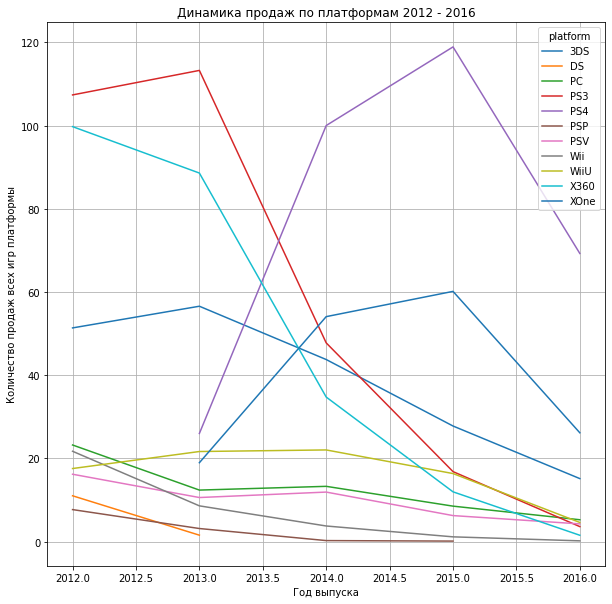

In [18]:
ax = df_2012_after.pivot_table(index = ['year_of_release'], columns = 'platform', values = 'total_sales', aggfunc = 'sum')
ax = ax.plot(kind = 'line', figsize = (10,10), grid=True)
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество продаж всех игр платформы')
plt.title('Динамика продаж по платформам 2012 - 2016');

Или 2016 год был провальным для всех платформ, или же за 2016 год данные не полные. 
(Это может быть по условию задачи).

Обрежем данные до 2015 года

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


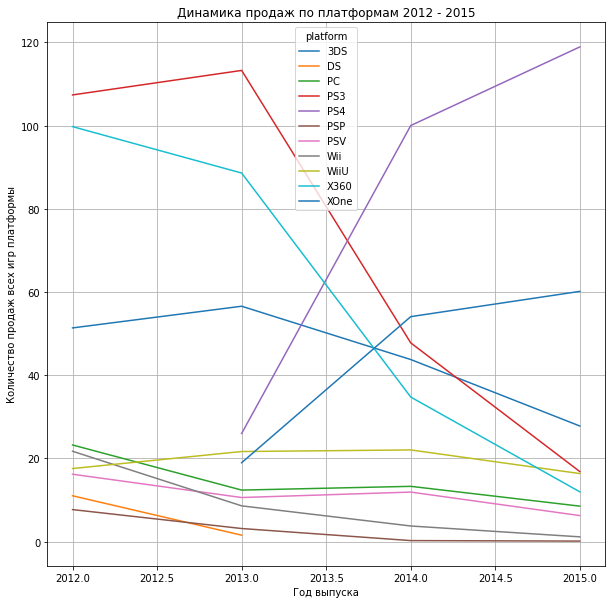

In [19]:
df_2012_after = df_2012_after.loc[df_2012_after['year_of_release']<2016].copy()
ax = df_2012_after.pivot_table(index = ['year_of_release'], columns = 'platform', values = 'total_sales', aggfunc = 'sum')
display(ax)
ax = ax.plot(kind = 'line', figsize = (10,10), grid=True)
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество продаж всех игр платформы')
plt.title('Динамика продаж по платформам 2012 - 2015');

PS4 и Xone растут по динамике продаж игр. При условии эффективной операционный деятельности (расходы), можно предположить, что эти платформы прибыльны.

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,0.552258,0.478696,0.380656,0.725405,NaN,0.072547,0.305472,0.700323,0.548750,0.940943,NaN
2013,0.621648,0.192500,0.325789,0.898810,1.624375,0.058148,0.168095,0.715833,0.515476,1.181067,0.997895
2014,0.547000,NaN,0.282553,0.442222,1.333333,0.024000,0.119000,0.625000,0.710645,0.551429,0.886393
2015,0.323023,NaN,0.170400,0.230411,0.867883,0.040000,0.056818,0.285000,0.583929,0.341714,0.751750


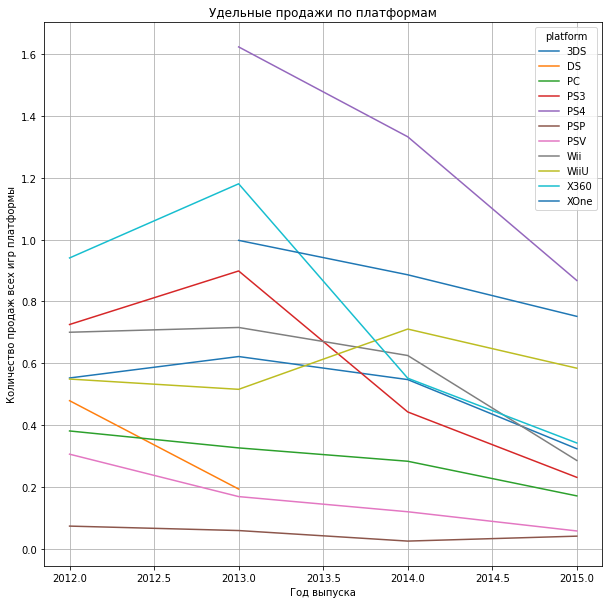

In [20]:
df_2012_after = df_2012_after.loc[df_2012_after['year_of_release']<2016].copy()
ax = df_2012_after.pivot_table(index = ['year_of_release'], columns = 'platform', values = 'total_sales', aggfunc = 'mean')
display(ax)
ax = ax.plot(kind = 'line', figsize = (10,10), grid=True)
 

Интересно, что удельные продажи игр по платформам снижаются - то есть, встает вопрос об успешности запускаемых продуктов. 

Количество выпущенных игр в динамике с 2012 года не падает у PC, 3DC, PS4, PSV, XOne. Кажется, что платформы выпускают  игры, которые не пользуются спросом.

In [21]:
#Определим лидеров по продажам
print('Топ-5 платформ по продажам за 2012-2015:')
display(df_2012_after.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = ['sum']).sort_values(by = ('sum', 'total_sales'),ascending=False).head())

Топ-5 платформ по продажам за 2012-2015:


,sum
,total_sales
platform,
PS3,285.19
PS4,244.89
X360,235.02
3DS,179.47
XOne,133.17


In [22]:
df_2012_after['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

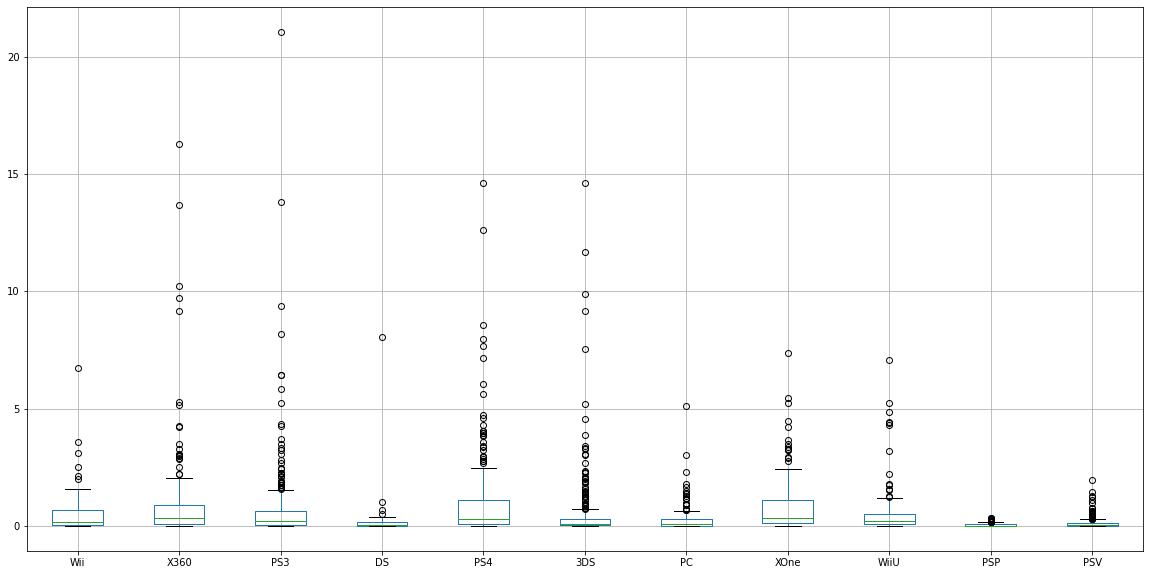

In [23]:
#Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам
df_2012_after.pivot_table(index = 'name', columns = 'platform', values = 'total_sales').boxplot(column=['Wii', 'X360', 'PS3', 'DS', 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSP', 'PSV'], figsize = (20,10));

In [24]:
#Посмотрим на чиловые значения статистики - не очень наглядно, но информативно
for i in df_2012_after['platform'].unique():
    print('Platform', i)
    display(df_2012_after.loc[df['platform'] == i]['total_sales'].describe())

Platform PS3


count    455.000000
mean       0.626791
std        1.515258
min        0.010000
25%        0.050000
50%        0.230000
75%        0.660000
max       21.050000
Name: total_sales, dtype: float64

Platform X360


count    279.000000
mean       0.842366
std        1.744755
min        0.010000
25%        0.100000
50%        0.340000
75%        0.890000
max       16.270000
Name: total_sales, dtype: float64

Platform PS4


count    228.000000
mean       1.074079
std        1.899788
min        0.010000
25%        0.097500
50%        0.310000
75%        1.105000
max       14.630000
Name: total_sales, dtype: float64

Platform 3DS


count    350.000000
mean       0.512771
std        1.424582
min        0.010000
25%        0.050000
50%        0.115000
75%        0.330000
max       14.600000
Name: total_sales, dtype: float64

Platform DS


count    31.000000
mean      0.404839
std       1.439245
min       0.010000
25%       0.020000
50%       0.050000
75%       0.185000
max       8.060000
Name: total_sales, dtype: float64

Platform XOne


count    160.000000
mean       0.832313
std        1.182243
min        0.010000
25%        0.130000
50%        0.350000
75%        1.137500
max        7.390000
Name: total_sales, dtype: float64

Platform WiiU


count    133.000000
mean       0.583383
std        1.105384
min        0.010000
25%        0.080000
50%        0.220000
75%        0.530000
max        7.090000
Name: total_sales, dtype: float64

Platform Wii


count    53.000000
mean      0.663962
std       1.174720
min       0.010000
25%       0.060000
50%       0.180000
75%       0.690000
max       6.760000
Name: total_sales, dtype: float64

Platform PC


count    196.000000
mean       0.292857
std        0.546894
min        0.010000
25%        0.030000
50%        0.100000
75%        0.292500
max        5.140000
Name: total_sales, dtype: float64

Platform PSV


count    326.000000
mean       0.137822
std        0.222652
min        0.010000
25%        0.030000
50%        0.060000
75%        0.150000
max        1.960000
Name: total_sales, dtype: float64

Platform PSP


count    173.000000
mean       0.064682
std        0.071296
min        0.010000
25%        0.020000
50%        0.030000
75%        0.090000
max        0.360000
Name: total_sales, dtype: float64

In [25]:
#посмотрим на количество игр в разрезе платформ
ax = df_2012_after.pivot_table(index = 'platform', values = 'total_sales', aggfunc = ['count','min','max','median']).round(2)
display(ax.sort_values(by = ('max','total_sales'),ascending = False))
#ax = ax.plot(style='o',figsize = (10,5), grid=True)
#ax.set_xlabel('Платформа')
#ax.set_ylabel('Количество игр по продажам')
#plt.title( 'Количество игр в разрезе платформ');

,count,min,max,median
,total_sales,total_sales,total_sales,total_sales
platform,,,,
PS3,455,0.01,21.05,0.23
X360,279,0.01,16.27,0.34
PS4,228,0.01,14.63,0.31
3DS,350,0.01,14.60,0.12
DS,31,0.01,8.06,0.05
XOne,160,0.01,7.39,0.35
WiiU,133,0.01,7.09,0.22
Wii,53,0.01,6.76,0.18


In [26]:
#посмотрим на ст. отклонения продаж в разрезе платформ
ax = df_2012_after.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'var').round(2)
ax['st_deviation'] = np.sqrt(ax['total_sales'])
ax = ax.drop('total_sales',axis = 1)
display(ax.sort_values(by = 'st_deviation',ascending = False))

,st_deviation
platform,
PS4,1.900000
X360,1.743560
PS3,1.516575
DS,1.438749
3DS,1.424781
XOne,1.183216
Wii,1.174734
WiiU,1.104536
PC,0.547723


Глобальные продажи игр в разрезе всех платформ за 2012 - 2015 годы описываются следующими характеристиками:
- За период платформы выпустили от 31 (DS) до 455 (PS3) игр
- Средние значения продаж находятся в пределах от 0,06  (РSP) до 1,07  (PS4) млн копий
- Медианы продаж -  в пределах от 0,03  (PSP) до 0,35  (XOne) млн копий
- Разброс в данных можно оценить через стандартное отклонение. Оно варьируется от 0,1 (PSP) до 1,9 (PS4)
- Минимальные объемы продаж для всех платформ - 0,01 млн копий. Максимумы - от 0,04 млн копий игры на PSP до - 21.05 млн копий (PS3)

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,platforms,sales,corr,score
5,XOne,133.17,0.459385,7.304587
2,PS4,244.89,0.431848,7.235714
1,X360,235.02,0.360573,7.087135
6,WiiU,77.59,0.354691,7.051852
3,3DS,179.47,0.333148,6.959574
0,PS3,285.19,0.331497,7.156542
8,PC,57.40,0.263157,7.590850
9,PSV,44.93,0.116121,7.102062
7,Wii,35.19,-0.424341,7.620000
4,DS,12.55,NaN,8.000000


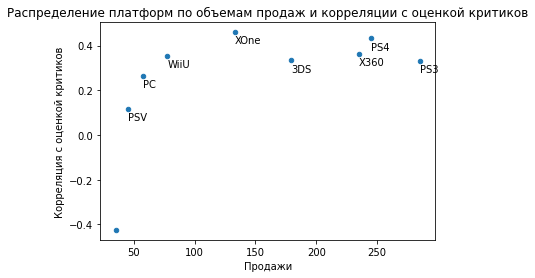

In [27]:
# Проанализируем связи между отзывами критиков и продажами в рамках одной платформы
corr = []
sales = []
platforms = []
score = []
for i in df_2012_after['platform'].unique():
    platforms.append(i)
    corr.append(df_2012_after.loc[df_2012_after['platform'] == i]['critic_score'].corr(df_2012_after.loc[df_2012_after['platform'] == i]['total_sales']))
    sales.append(df_2012_after.loc[df_2012_after['platform'] == i]['total_sales'].sum())
    score.append(df_2012_after.loc[df_2012_after['platform'] == i]['critic_score'].mean())

    
d = {'platforms': platforms, 'sales': sales, 'corr': corr, 'score': score}
ax = pd.DataFrame(data=d)
display(ax.sort_values(by = 'corr',ascending = False))
ax = ax.plot(kind = 'scatter',x = 'sales', y = 'corr')
ax.set_xlabel('Продажи')
ax.set_ylabel('Корреляция с оценкой критиков')
plt.title( 'Распределение платформ по объемам продаж и корреляции с оценкой критиков');

for i in range(len(platforms)):
    plt.annotate(platforms[i], (sales[i]+0.05, corr[i]-0.05))

В целом можно утвеждать, что есть связь между оценкой критиков и продажами.
Наиболее сильные (корреляция выше 0,4 по модулю) связи - на платформах XOne, PS4, Wii. 
При этом у Wii обратная связь оценки критиков и объема продаж - странно. У прочих платформ прямая зависимость, поэтому примем Wii за исключение.


Построим для самой популярной платформы (самые большие продажи) PS3 диаграмму рассеяния.

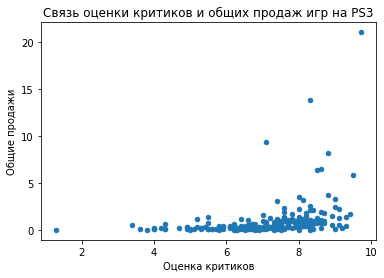

In [28]:
ax = df_2012_after.loc[df_2012_after['platform'] == 'PS3'].plot(x='critic_score',y='total_sales',kind='scatter')
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Общие продажи')
plt.title( 'Связь оценки критиков и общих продаж игр на PS3');

,platforms,sales,corr,score
4,DS,12.55,0.882709,7.000000
6,WiiU,77.59,0.413265,6.868132
7,Wii,35.19,0.296197,6.082353
3,3DS,179.47,0.210567,6.994118
2,PS4,244.89,0.024231,6.666667
9,PSV,44.93,0.013595,7.369231
1,X360,235.02,-0.009605,6.283772
0,PS3,285.19,-0.021714,6.602555
5,XOne,133.17,-0.039268,6.477586
8,PC,57.40,-0.159228,6.465217


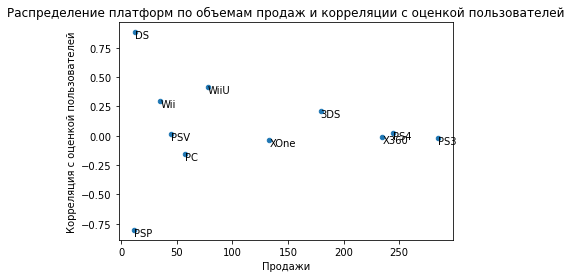

In [29]:
# Проанализируем связи между отзывами пользователей и продажами в рамках одной платформы
corr = []
sales = []
platforms = []
score = []
for i in df_2012_after['platform'].unique():
    platforms.append(i)
    corr.append(df_2012_after.loc[df_2012_after['platform'] == i]['user_score'].corr(df_2012_after.loc[df_2012_after['platform'] == i]['total_sales']))
    sales.append(df_2012_after.loc[df_2012_after['platform'] == i]['total_sales'].sum())
    score.append(df_2012_after.loc[df_2012_after['platform'] == i]['user_score'].mean())

    
d = {'platforms': platforms, 'sales': sales, 'corr': corr, 'score': score}
ax = pd.DataFrame(data=d)
display(ax.sort_values(by = 'corr',ascending = False))
ax = ax.plot(kind = 'scatter',x = 'sales', y = 'corr')
ax.set_xlabel('Продажи')
ax.set_ylabel('Корреляция с оценкой пользователей')
plt.title( 'Распределение платформ по объемам продаж и корреляции с оценкой пользователей');

for i in range(len(platforms)):
    plt.annotate(platforms[i], (sales[i]+0.05, corr[i]-0.05))

Аналогично, наиболее сильные связи между оценкми пользователей и продажами (топ-3 корреляции по модулю) - у платформ PSP, DS & WiiU. При этом нет однозначного ответа - прямая или обратная зависимость: максимальные корреляции по модулю получились по платформам с минимальгными продажами. Больше продажи - слабее связь с оценкой пользователей.

Отобразим зависимость оценки и продаж для самой популярной платформы - PS3.

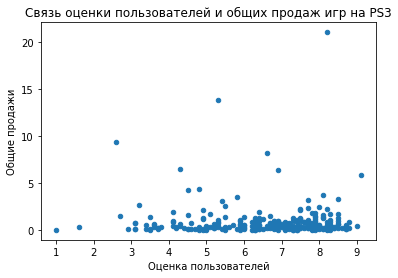

In [30]:
ax = df_2012_after.loc[df_2012_after['platform'] == 'PS3'].plot(x='user_score',y='total_sales',kind='scatter')
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Общие продажи')
plt.title( 'Связь оценки пользователей и общих продаж игр на PS3');

В целом можно утверждать, что есть связь между продажами и оценками критиков. Оценки пользователей не влияют на продажи.

In [31]:
#Посмотрим на показатели игр в разрезе жанров.
#display(df_2012_after.head())

ax = df_2012_after.pivot_table(index = ['genre'],values = ['total_sales', 'na_sales', 'eu_sales','jp_sales','other_sales','critic_score','user_score'], aggfunc = ['sum','mean']).sort_values(by = ('mean','total_sales'),ascending = False)
ax = ax.drop([('sum','critic_score')],axis = 1)
ax = ax.drop([('sum','user_score')],axis = 1)

display(ax)


sum                                                   mean  \
             eu_sales jp_sales na_sales other_sales total_sales critic_score   
genre                                                                          
Shooter         97.57     8.17   128.53       32.24      266.51     7.271111   
Platform        20.02     8.52    24.09        5.14       57.77     7.591667   
Sports          57.08     7.09    73.99       19.42      157.58     7.238462   
Racing          25.52     2.49    16.49        6.21       50.71     7.121212   
Role-Playing    44.25    58.83    58.11       13.43      174.62     7.256429   
Simulation      13.28    10.08     7.81        2.06       33.23     6.751724   
Misc            25.66    11.82    37.43        7.53       82.44     7.282353   
Action         148.66    45.73   168.55       48.07      411.01     7.161035   
Fighting         9.45     8.69    17.95        3.93       40.02     6.975926   
Strategy         4.58     2.65     3.99        0.99       12.21     7.317391   
Puzzle           1.39     2.14     1.13        0.22        4.88     7.544444   
Adventure        8.14     7.06     7.97        2.44       25.61     7.221951   

                                                                               
              eu_sales  jp_sales  na_sales other_sales total_sales user_score  
genre                                                                          
Shooter       0.518989  0.043457  0.683670    0.171489    1.417606   6.398726  
Platform      0.286000  0.121714  0.344143    0.073429    0.825286   7.119643  
Sports        0.259455  0.032227  0.336318    0.088273    0.716273   5.461392  
Racing        0.280440  0.027363  0.181209    0.068242    0.557253   5.918841  
Role-Playing  0.140032  0.186171  0.183892    0.042500    0.552595   7.194631  
Simulation    0.214194  0.162581  0.125968    0.033226    0.535968   6.578125  
Misc          0.160375  0.073875  0.233938    0.047062    0.515250   6.881967  
Action        0.174279  0.053611  0.197597    0.056354    0.481841   6.861187  
Fighting      0.101613  0.093441  0.193011    0.042258    0.430323   6.900000  
Strategy      0.078966  0.045690  0.068793    0.017069    0.210517   6.107407  
Puzzle        0.051481  0.079259  0.041852    0.008148    0.180741   7.633333  
Adventure     0.033089  0.028699  0.032398    0.009919    0.104106   7.418868

In [32]:
df_2012_after['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

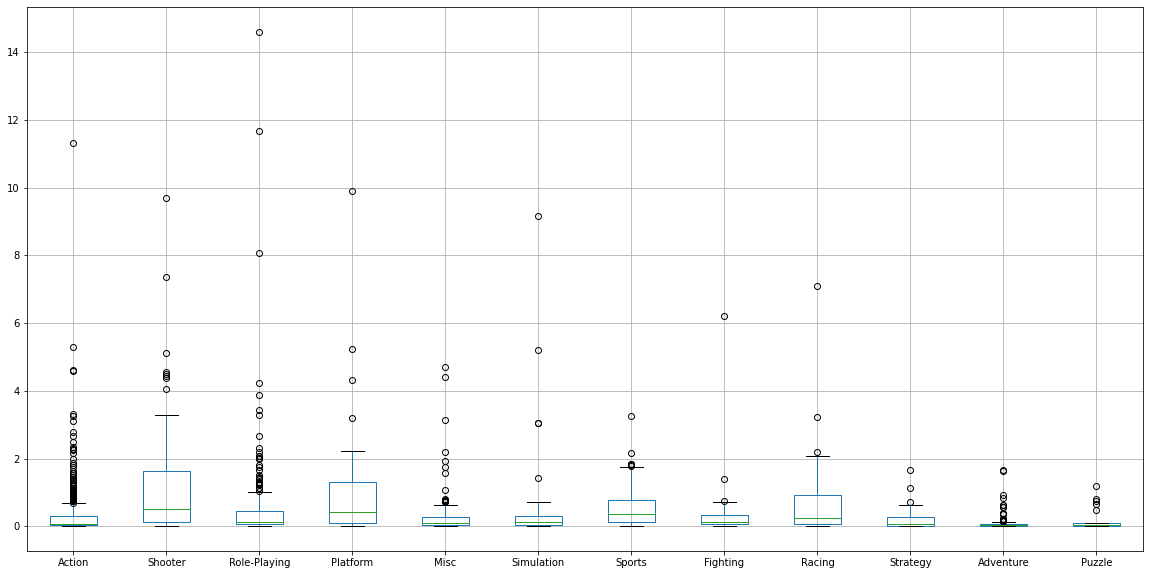

In [33]:
#Построим «ящик с усами» по глобальным продажам игр в разбивке по жанрам
df_2012_after.pivot_table(index = 'name', columns = 'genre', values = 'total_sales').boxplot(column=['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], figsize = (20,10));

In [34]:
ax = df_2012_after.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['min','max','count','mean','median']).round(2)
display(ax.sort_values(by = ('max','total_sales'),ascending = False))

,min,max,count,mean,median
,total_sales,total_sales,total_sales,total_sales,total_sales
genre,,,,,
Action,0.01,21.05,853,0.48,0.14
Shooter,0.01,14.63,188,1.42,0.52
Role-Playing,0.01,14.60,316,0.55,0.15
Platform,0.01,9.90,70,0.83,0.29
Misc,0.01,9.18,160,0.52,0.18
Simulation,0.01,9.17,62,0.54,0.15
Sports,0.01,8.58,220,0.72,0.31
Fighting,0.01,7.55,93,0.43,0.16


In [35]:
#посмотрим на ст. отклонения продаж в разрезе жанров
ax = df_2012_after.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'var').round(2)
ax['st_deviation'] = np.sqrt(ax['total_sales'])
ax = ax.drop('total_sales',axis = 1)
display(ax.sort_values(by = 'st_deviation',ascending = False))

,st_deviation
genre,
Shooter,2.420744
Platform,1.473092
Simulation,1.400000
Role-Playing,1.363818
Action,1.268858
Misc,1.170470
Sports,1.126943
Fighting,0.974679
Racing,0.974679


In [36]:
ax = df_2012_after.pivot_table(index = 'genre', values = 'critic_score', aggfunc = ['mean']).round(2)
display(ax.sort_values(by = ('mean','critic_score'),ascending = False))

,mean
,critic_score
genre,
Platform,7.59
Puzzle,7.54
Strategy,7.32
Misc,7.28
Shooter,7.27
Role-Playing,7.26
Sports,7.24
Adventure,7.22


In [37]:
ax = df_2012_after.pivot_table(index = 'genre', values = 'user_score', aggfunc = ['mean']).round(2)
display(ax.sort_values(by = ('mean','user_score'),ascending = False))

,mean
,user_score
genre,
Puzzle,7.63
Adventure,7.42
Role-Playing,7.19
Platform,7.12
Fighting,6.90
Misc,6.88
Action,6.86
Simulation,6.58


Жанры-лидеры продаж - это:
- Action
- Shooter
- Role-Playing

При этом если сравнить их по средним продажам игр, то "стабильно успешные" жанры - это:
- Shooter
- Platform
- Sports

Глобальные продажи игр в разрезе жанров за 2012 - 2015 годы описываются следующими характеристиками:
- За период выпустили от 27 (Puzzle) до 853 (Action) игр
- Средние значения продаж находятся в пределах от 0,01  (Adventure) до 1,42  (Shooter) млн копий
- Медианы продаж -  в пределах от 0,03  (Adventure) до 0,52  (Shooter) млн копий
- Разброс в данных можно оценить через стандартное отклонение. Оно варьируется от 0,2 (Adventure) до 2,4 (Shooter)
- Минимальные объемы продаж для всех жанров - 0,01 млн копий. Максимумы - от 1,19  млн копий Puzzle до - 21.05 млн копий Action

Пользователи выше прочих оценивают игры жанров Puzzle и Adventure, критики - Platform и Puzzle.

### Портрет пользователя каждого региона

#### Задача:
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для анализа используем данные за период - с 2012 года по 2015 годы, чтобы определить актуальный портрет пользователя.

In [38]:
#Определим самые популярные платформы в разрезе по регионам

print('Top-5 platforms for NA:')
ax = (df_2012_after.pivot_table(index = ['platform'],values = ['na_sales'], aggfunc = ['sum']).sort_values(by = ('sum','na_sales'),ascending = False).head())
ax['share'] = ax[('sum','na_sales')]/df_2012_after['na_sales'].sum()
display(ax)
print('Top-5 platforms for JP:')
ax = (df_2012_after.pivot_table(index = ['platform'],values = ['jp_sales'], aggfunc = ['sum']).sort_values(by = ('sum','jp_sales'),ascending = False).head())
ax['share'] = ax[('sum','jp_sales')]/df_2012_after['jp_sales'].sum()
display(ax)
print('Top-5 platforms for EU:')
ax = (df_2012_after.pivot_table(index = ['platform'],values = ['eu_sales'], aggfunc = ['sum']).sort_values(by = ('sum','eu_sales'),ascending = False).head())
ax['share'] = ax[('sum','eu_sales')]/df_2012_after['eu_sales'].sum()
display(ax)

Top-5 platforms for NA:


,sum,share
,na_sales,
platform,,
X360,139.36,0.255219
PS3,102.71,0.188100
PS4,87.25,0.159787
XOne,78.85,0.144403
3DS,51.17,0.093711


Top-5 platforms for JP:


,sum,share
,jp_sales,
platform,,
3DS,79.76,0.460322
PS3,33.99,0.196168
PSV,17.48,0.100883
WiiU,12.34,0.071218
PSP,10.47,0.060426


Top-5 platforms for EU:


,sum,share
,eu_sales,
platform,,
PS4,109.31,0.239925
PS3,105.60,0.231782
X360,73.81,0.162006
XOne,41.96,0.092098
3DS,40.31,0.088477


In [39]:
#Определим самые популярные жанры в разрезе по регионам

print('Top-5 genres for NA:')
ax = (df_2012_after.pivot_table(index = ['genre'],values = ['na_sales'], aggfunc = ['mean']).sort_values(by = ('mean','na_sales'),ascending = False))
display(ax.head())
print('Top-5 genres for JP:')
ax = (df_2012_after.pivot_table(index = ['genre'],values = ['jp_sales'], aggfunc = ['mean']).sort_values(by = ('mean','jp_sales'),ascending = False).head())
display(ax.head())
print('Top-5 genres for EU:')
ax = (df_2012_after.pivot_table(index = ['genre'],values = ['eu_sales'], aggfunc = ['mean']).sort_values(by = ('mean','eu_sales'),ascending = False).head())
display(ax.head())

Top-5 genres for NA:


,mean
,na_sales
genre,
Shooter,0.683670
Platform,0.344143
Sports,0.336318
Misc,0.233938
Action,0.197597


Top-5 genres for JP:


,mean
,jp_sales
genre,
Role-Playing,0.186171
Simulation,0.162581
Platform,0.121714
Fighting,0.093441
Puzzle,0.079259


Top-5 genres for EU:


,mean
,eu_sales
genre,
Shooter,0.518989
Platform,0.286000
Racing,0.280440
Sports,0.259455
Simulation,0.214194


In [40]:
#Определим самые популярные категории в разрезе по регионам

print('Ratings for NA:')
ax = (df_2012_after.pivot_table(index = ['rating'],values = ['na_sales'], aggfunc = ['sum']).sort_values(by = ('sum','na_sales'),ascending = False))
ax['share'] = ax[('sum','na_sales')]/df_2012_after['na_sales'].sum()
display(ax)
print('Ratings for JP:')
ax = (df_2012_after.pivot_table(index = ['rating'],values = ['jp_sales'], aggfunc = ['sum']).sort_values(by = ('sum','jp_sales'),ascending = False))
ax['share'] = ax[('sum','jp_sales')]/df_2012_after['jp_sales'].sum()
display(ax)
print('Ratings for EU:')
ax = (df_2012_after.pivot_table(index = ['rating'],values = ['eu_sales'], aggfunc = ['sum']).sort_values(by = ('sum','eu_sales'),ascending = False))
ax['share'] = ax[('sum','eu_sales')]/df_2012_after['eu_sales'].sum()
display(ax)

Ratings for NA:


,sum,share
,na_sales,
rating,,
M,215.90,0.395392
E,106.40,0.194858
Unknown,94.78,0.173577
E10+,71.89,0.131657
T,57.07,0.104516


Ratings for JP:


,sum,share
,jp_sales,
rating,,
Unknown,94.52,0.545507
E,27.26,0.157327
T,23.75,0.137069
M,20.00,0.115427
E10+,7.74,0.044670


Ratings for EU:


,sum,share
,eu_sales,
rating,,
M,177.42,0.389421
E,99.42,0.218218
Unknown,84.03,0.184438
E10+,51.56,0.113169
T,43.17,0.094754


________________________________________________________
Европа:
________________________________________________________
Топ-5 жанров EU с максимальными средними продажами:
- Shooter
- Platform
- Racing
- Sports 
- Simulation
 

Топ-5 платформ EU совокупно составляют 81% всех продаж:
- PS4 (24%)
- PS3(23%)
- X360 (16%)
- XOne (9%)
- 3DS (9%)

Игры M(17+) - самые популярные, после идут игры E(6+), затем - игры без присвоенного рейтинга
________________________________________________________
Северная Америка:
________________________________________________________
Топ-5 жанров NA с максимальными средними продажами
- Shooter
- Platform
- Sports 
- Misc 
- Action 

Топ-5 платформ NA совокупно составляют 84% всех продаж:
- X360 (26%)
- PS3 (19%)
- PS4 (16%)
- XOne (14%)
- 3DS (9%)


Игры М(17+) - самые популярные, после идут игры Е(6+),  затем  - игры без присвоенного рейтинга
________________________________________________________
Япония:
________________________________________________________
Топ-5 жанров JP  c максимальными средними продажами
- Role-Playing 
- Simulation
- Platform 
- Fighting
- Puzzle


Отличие в наборе популярных жанров между странами может быть объяснено культурными особенностями.

Топ-5 платформ JP совокупно составляют 89% всех продаж:
- 3DS (46%)
- PS3 (20%)
- PSV (10%)
- WiiU (7%)
- PSP (6%)

Игры без присвоенного рейтинга - самые популярные, после идут игры Е(6+), затем - Т(13+)

### Проверка гипотез

#### Гипотеза 1:
Нулевая: средние пользовательские рейтинги платформ Xbox One и PC равны

Альтернативная: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [41]:
df_2012_after = df_2012_after.dropna(subset=['user_score']) #Удалим игры без оценок - с ними не вычисляется pvalue

In [42]:
# Проверим гипотезу двусторонним тестом 
#(нам неважно, больше или меньше значения средних, поэтому тест двусторонний)


alpha = .01 # критический уровень статистической значимости
interested_value = df_2012_after.loc[df_2012_after['platform'] == 'XOne']['user_score'].mean() #средний пользовательский рейтинг платформы Xbox
user_score_PC = df_2012_after.loc[df_2012_after['platform']=='PC']['user_score'] #срез оценок по другой платформе

results = st.ttest_1samp(
    user_score_PC, 
    interested_value)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9241799928962661
Не получилось отвергнуть нулевую гипотезу


#### Гипотеза 2:
Нулевая: средние пользовательские рейтинги жанров Action и Sports не равны.

Альтернативная: средние пользовательские рейтинги жанров Action и Sports равны.

In [43]:
# Проверим гипотезу двусторонним тестом 
#(нам неважно, больше или меньше значения средних, поэтому тест двусторонний)


alpha = .01 # критический уровень статистической значимости
interested_value = df_2012_after.loc[df_2012_after['genre'] == 'Action']['user_score'].mean() #средний пользовательский рейтинг жанра Action
user_score_sports = df_2012_after.loc[df_2012_after['genre']=='Sports']['user_score'] #срез оценок жанра Sports

results = st.ttest_1samp(
    user_score_sports, 
    interested_value)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.196279659953657e-20
Отвергаем нулевую гипотезу


Проверка гипотез показала, что:
- средние пользовательские рейтинги платформ Xbox One и PC равны
- средние пользовательские рейтинги жанров Action и Sports не равны

### Общий вывод

- Для выявления закономерностей, определяющих успешность игры, мы опирались на открытые данные за период 1980 - 2016.
- Активное создание игр началось в 2000-х и достигло пика в 2009.
- Топ-5 платформ с самыми большими продажами игр за весь период - это PS3, PS4, X360, 3DS, Xone.


- Средняя продолжительность жизни платформы - 5-10 лет. То есть, чтобы построить прогноз на 2017, нужно опираться на данные после 2007 года. Т.к. компьютерные игры - динамично изменяющаяся индустрия, сфокусируемся на данных с 2012 года.

- Платформы-лидеры продаж с 2012 по 2015 годы - это PS3, X360, Wii, DS, PS4. 
- При этом PS4 и Xone растут по динамике продаж игр. При условии эффективной операционный деятельности (управление расходами), можно предположить, что эти платформы прибыльны.
- Глобальные продажи игр в разрезе всех платформ за 2007 - 2015 годы описываются следующими характеристиками:
    - За период платформы выпустили от 31 (DS) до 455 (PS3) игр
    - Средние значения продаж находятся в пределах от 0,06  (РSP) до 1,07  (PS4) млн копий
    - Медианы продаж -  в пределах от 0,03  (PSP) до 0,35  (XOne) млн копий
    - Разброс в данных можно оценить через стандартное отклонение. Оно варьируется от 0,1 (PSP) до 1,9 (PS4)
    - Минимальные объемы продаж для всех платформ - 0,01 млн копий. Максимумы - от 0,04 млн копий игры на PSP до - 21.05 млн копий (PS3)
    
- Жанры-лидеры продаж - это Action, Shooter, Role-Playing.
- «Стабильно успешные" жанры по средним продажам - это Shooter, Platform, Sports.
- Пользователи выше прочих оценивают игры жанров Puzzle и Adventure, критики - Platform и Puzzle.
- Глобальные продажи игр в разрезе жанров за 2012 - 2015 годы описываются следующими характеристиками:
    - За период выпустили от 27 (Puzzle) до 853 (Action) игр
    - Средние значения продаж находятся в пределах от 0,01  (Adventure) до 1,42  (Shooter) млн копий
    - Медианы продаж -  в пределах от 0,03  (Adventure) до 0,52  (Shooter) млн копий
    - Разброс в данных можно оценить через стандартное отклонение. Оно варьируется от 0,2 (Adventure) до 2,4 (Shooter)
    - Минимальные объемы продаж для всех жанров - 0,01 млн копий. Максимумы - от 1,19  млн копий Puzzle до - 21.05 млн копий Action

- В целом можно утвеждать, что есть связь между оценкой критиков и продажами.
- Оценка пользователей не влияет на продажи.

- Есть специфика рынков в зависимости от регионов:
    - В Северной Америке и Европе предпочитают Shooter/ Platform игры на платформах X360, PS3 и PS4  
    - В Японии играют в Role-Playing/ Simulation жанры на платформе 3DS.

- Проверка гипотез показала, что:
    - средние пользовательские рейтинги платформ Xbox One и PC равны
    - средние пользовательские рейтинги жанров Action и Sports не равны.

Таким образом, наиболее популярные продукты - это игры жанра shooter, platform на платформах X360, PS3 с высокими оценками критиков. Для диверсификации можно расширить предложение продуктами на растущих платформах PS4 и Xone.